# Disease detection on PlantDoc using YOLOv7

To train YOLOv7 on the PlantDoc dataset, we take the following steps:

- Install YOLOv7 dependencies
- Load the PlantDoc dataset from Roboflow in YOLOv7 format
- Run YOLOv7 training
- Evaluate YOLOv7 performance

## Install dependencies

In [2]:
%%capture
! git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
! pip install -r requirements.txt

## Download the PlantDoc dataset in YOLOv7 format
Next, we use the Python API provided by Roboflow to download the PlantDoc dataset, `api_key` should be replaced by your api key gotten from Roboflow.

In [ ]:
%%capture
! pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR API KEY")
project = rf.workspace("joseph-nelson").project("plantdoc")
dataset = project.version(1).download("yolov7")

## Start Training
First, download the YOLOv7 model pre-trained on the COCO dataset

In [4]:
%%capture
! wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

Then, custom training on the PlantDoc dataset, we pass a number of arguments:
- batch: batch size
- epochs: the number of training epochs
- data: the PlantDoc dataset is saved in `dataset.location` folder
- weights: the COCO pre-trained YOLOv7 weights
- device: setting GPU
- img-size: image size. Here, the images of the PlantDoc dataset have size (416,416)

> **Note**: If hit error, please see [the error resolve](https://stackoverflow.com/questions/74372636/indices-should-be-either-on-cpu-or-on-the-same-device-as-the-indexed-tensor)

In [14]:
! python train.py --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights 'yolov7_training.pt' --device 0 --img-size 416

YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.13.1+cu117 CUDA:0 (NVIDIA A100-SXM4-80GB, 81069.75MB)

Namespace(weights='yolov7_training.pt', cfg='', data='/notebooks/yolov7/PlantDoc-1/data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=100, batch_size=16, img_size=[416, 416], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='exp', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs/train/exp6', total_batch_size=16)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_mom

## Evaluation
We pass a number of arguments to the evaluation scripts:
- weights: the best weights after custom training on the PlantDoc dataset
- conf: confidence threshold
- source: the validation images
- img_size: image size

In [ ]:
# Run evaluation
! python detect.py --weights runs/train/exp6/weights/best.pt --conf 0.1 --source {dataset.location}/valid/images --img-size 416

We show 5*5 images from the validation data, and the disease detection results of these images, to visualize the performance of YOLOv7

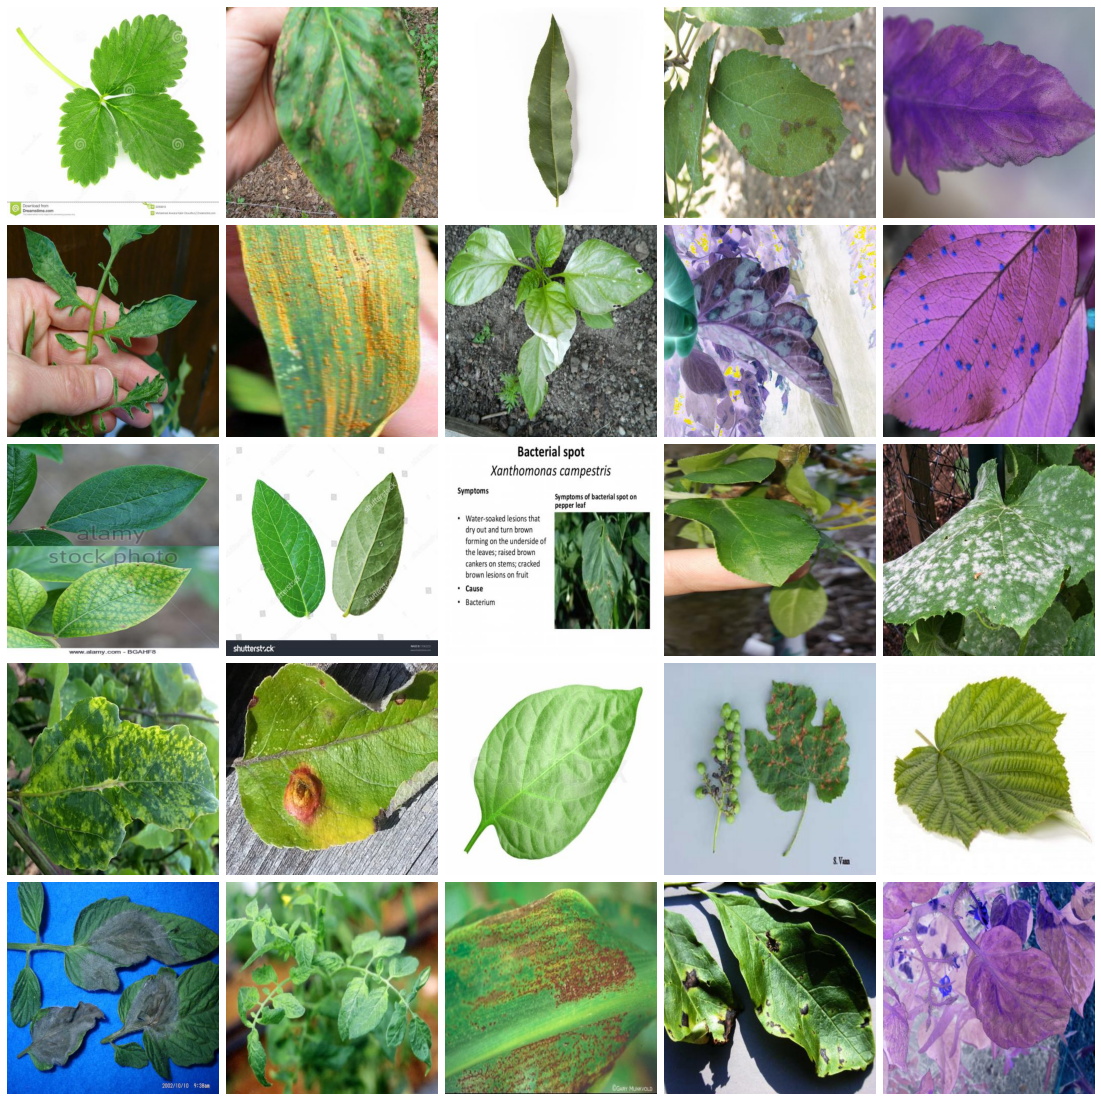

In [17]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

root_dir = dataset.location + '/valid/images/'
img_paths = [os.path.join(root_dir, img_name) for img_name in os.listdir(root_dir)]
fig = plt.figure(figsize=(20,20))
grid = ImageGrid(fig, 111, # similar to subplot(111)
                 nrows_ncols=(5,5),
                 axes_pad=0.1
                )
for ax, img_path in zip(grid, img_paths):
    img = Image.open(img_path)
    ax.axis('off')
    ax.imshow(img)

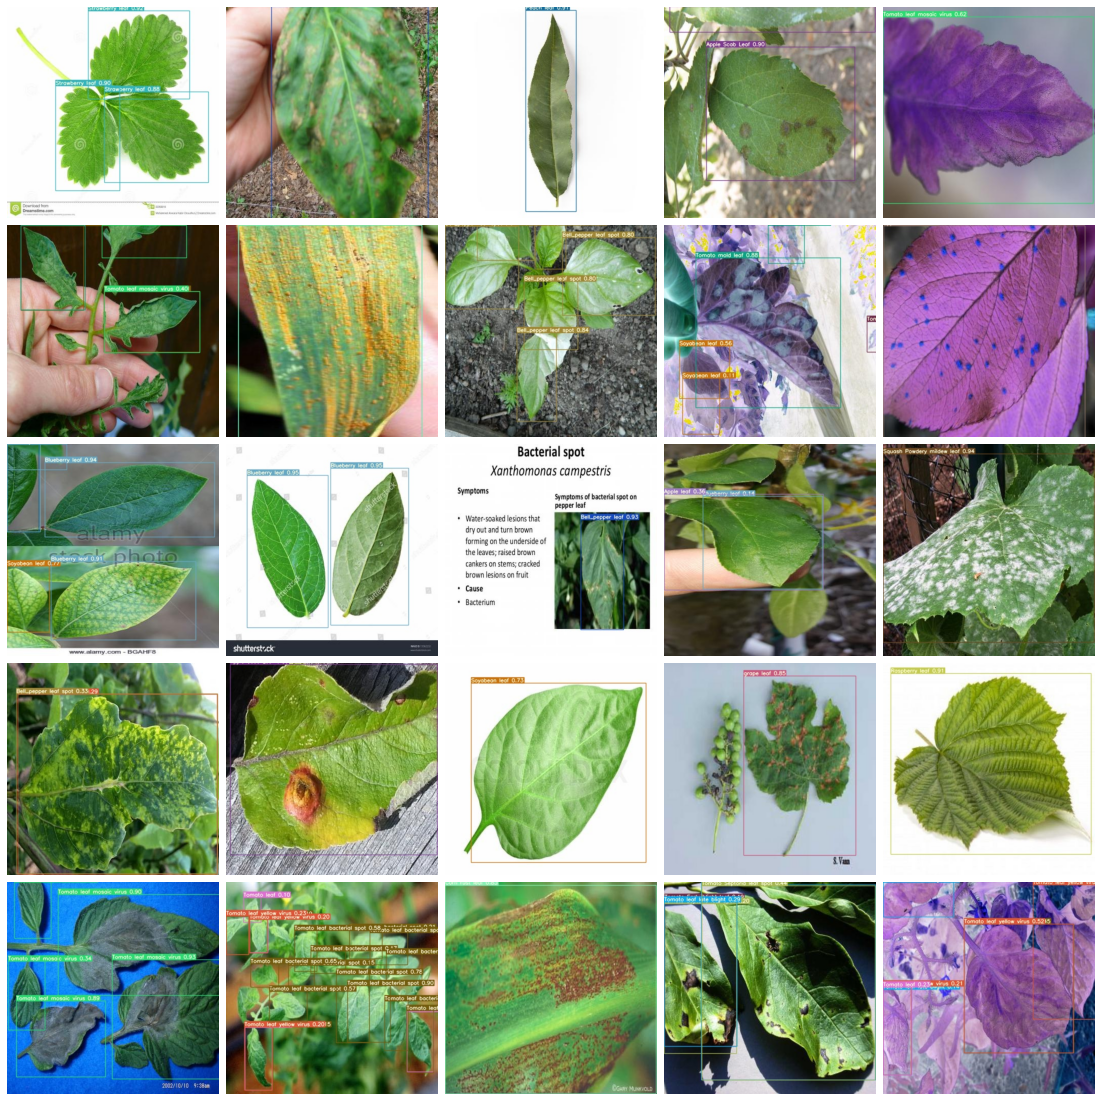

In [12]:
root_dir = "/notebooks/yolov7/runs/detect/exp3/"
img_paths = [os.path.join(root_dir, img_name) for img_name in os.listdir(root_dir)]
fig = plt.figure(figsize=(20,20))
grid = ImageGrid(fig, 111, # similar to subplot(111)
                 nrows_ncols=(5,5),
                 axes_pad=0.1
                )
for ax, img_path in zip(grid, img_paths):
    img = Image.open(img_path)
    ax.axis('off')
    ax.imshow(img)